In [1]:
import numpy as np

# Sentinel_1_GRD

## Define Area Extents  

In [2]:
from datetime import datetime
# That I can sqap areas
vietnam_extent = dict(
    lat  = (10.9348, 11.0190),
    lon  = (107.8164, 107.9168),
    time = (datetime(2015,1,1), datetime(2017,1,1)),
)

menindee_extent = dict(
    lat = ( -32.420,-32.272),
    lon = (142.2348, 142.407),
)

extent = menindee_extent

A quick visualization of the area before it is loaded through the datacube 

In [3]:
from utils.data_cube_utilities.dc_display_map import display_map

display_map(latitude  = extent['lat'],
            longitude = extent['lon'])  

# Display Available Products. Pick a product to load. 
The following code loads a datacube object. Loads a list of available products, and filters in favor of products containing the word `s1`. 

In [4]:
import datacube
dc = datacube.Datacube(config = "/home/localuser/.datacube.conf")

products = dc.list_products()
products[products['name'].str.contains("s1")]  

name  \
id                             
57        s1_gamma0_colombia   
58       s1_gamma0_lake_chad   
59  s1_gamma0_menindee_lakes   
10           s1_gamma0_scene   
60         s1_gamma0_vietnam   

                                          description product_type  time  \
id                                                                         
57  Sentinel-1A/B SAR Gamma0, processed to the CEO...       gamma0  None   
58  Sentinel-1A/B SAR Gamma0, processed to the CEO...       gamma0  None   
59  Sentinel-1A/B SAR Gamma0, processed to the CEO...       gamma0  None   
10  Sentinel-1A/B SAR Gamma0 scenes, processed to ...       gamma0  None   
60  Sentinel-1A/B SAR Gamma0, processed to the CEO...       gamma0  None   

     lon   lat    platform  format instrument        crs  \
id                                                         
57  None  None  SENTINEL_1  NetCDF        SAR  EPSG:4326   
58  None  None  SENTINEL_1  NetCDF        SAR  EPSG:4326   
59  None  None  SENTINEL_1  NetCDF        SAR  EPSG:4326   
10  None  None  SENTINEL_1    ENVI        SAR        NaN   
60  None  None  SENTINEL_1  NetCDF        SAR  EPSG:4326   

                           resolution                   tile_size  \
id                                                                  
57  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   
58  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   
59  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   
10                                NaN                         NaN   
60  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   

       spatial_dimensions  
id                         
57  (latitude, longitude)  
58  (latitude, longitude)  
59  (latitude, longitude)  
10                    NaN  
60  (latitude, longitude)

# Define a product and platform 

In [5]:
menindee_extent["product"]  = "s1_gamma0_menindee_lakes"
menindee_extent["platform"] = "SENTINEL_1"

vietnam_extent["product"]   = "s1_gamma0_vietnam"
vietnam_extent["platform"]  = "SENTINEL_1"

# View basic metadata about this product

In [6]:
from utils.data_cube_utilities.data_access_api import DataAccessApi
dca = DataAccessApi(config = '/home/localuser/.datacube.conf')

dca.get_datacube_metadata(platform = extent["platform"],
                         product  = extent["product"])

{'lat_extents': (-33.174948936, -31.556389028968),
 'lon_extents': (141.6003918, 143.21868199200003),
 'pixel_count': 36006000,
 'tile_count': 58,
 'time_extents': (datetime.datetime(2016, 2, 15, 19, 48, 13, 448000),
  datetime.datetime(2016, 12, 23, 19, 48, 19, 587000))}

In [7]:
product_details = dc.list_products()[dc.list_products().name ==extent["product"]]
product_details

name  \
id                             
59  s1_gamma0_menindee_lakes   

                                          description product_type  time  \
id                                                                         
59  Sentinel-1A/B SAR Gamma0, processed to the CEO...       gamma0  None   

     lon   lat    platform  format instrument        crs  \
id                                                         
59  None  None  SENTINEL_1  NetCDF        SAR  EPSG:4326   

                           resolution                   tile_size  \
id                                                                  
59  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   

       spatial_dimensions  
id                         
59  (latitude, longitude)

# Load Data  


In [8]:
import datacube
dc = datacube.Datacube(config = "/home/localuser/.datacube.conf")

dataset = dc.load(**extent)

In [9]:
dataset

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639, time: 54)
Coordinates:
  * time       (time) datetime64[ns] 2016-02-15T19:48:13.448436 ...
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vh         (time, latitude, longitude) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    vv         (time, latitude, longitude) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      EPSG:4326

# View an acquisition in dataset

In [10]:
first_slice = dataset.isel(time = 1) # iselect selects by index, rather than value.

In [11]:
first_slice

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
    time       datetime64[ns] 2016-02-27T19:47:48.429262
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vh         (latitude, longitude) float32 0.00291662 0.00763605 0.0033502 ...
    vv         (latitude, longitude) float32 0.0203737 0.013546 0.0154714 ...
Attributes:
    crs:      EPSG:4326

> Helper function for plotting

In [12]:
def figure_ratio(ds, fixed_width = 20):
    width = fixed_width
    height = len(ds.latitude) * (fixed_width / len(ds.longitude))
    return (width, height)

### plot vh
A few outliers might distort the output. The following code will plot `vh` bands on a logarithmic scale

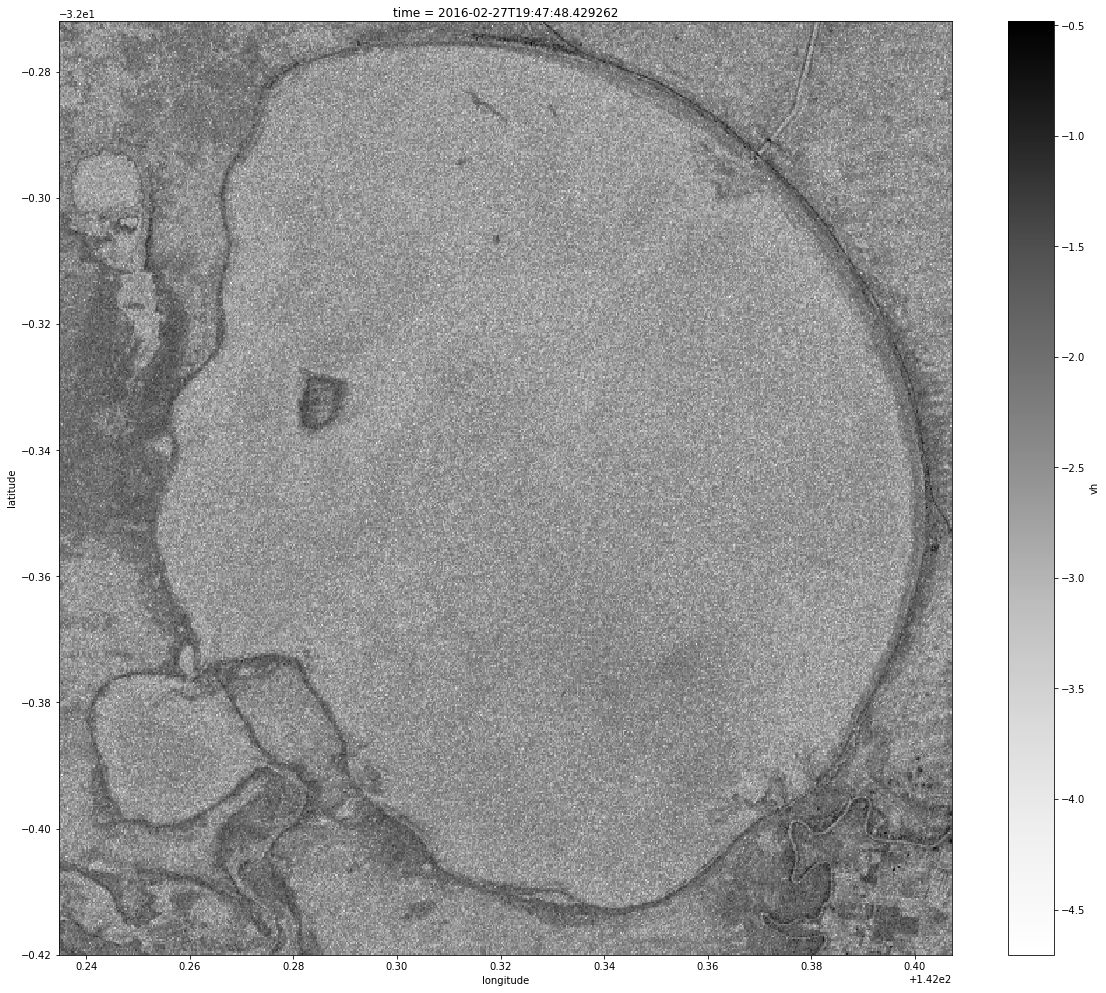

In [13]:
%matplotlib inline
np.log10(first_slice.vh).plot(cmap = "Greys", figsize = figure_ratio(first_slice))

### plot vv
A few outliers might distort the output. The following code will plot `vh` bands on a logarithmic scale

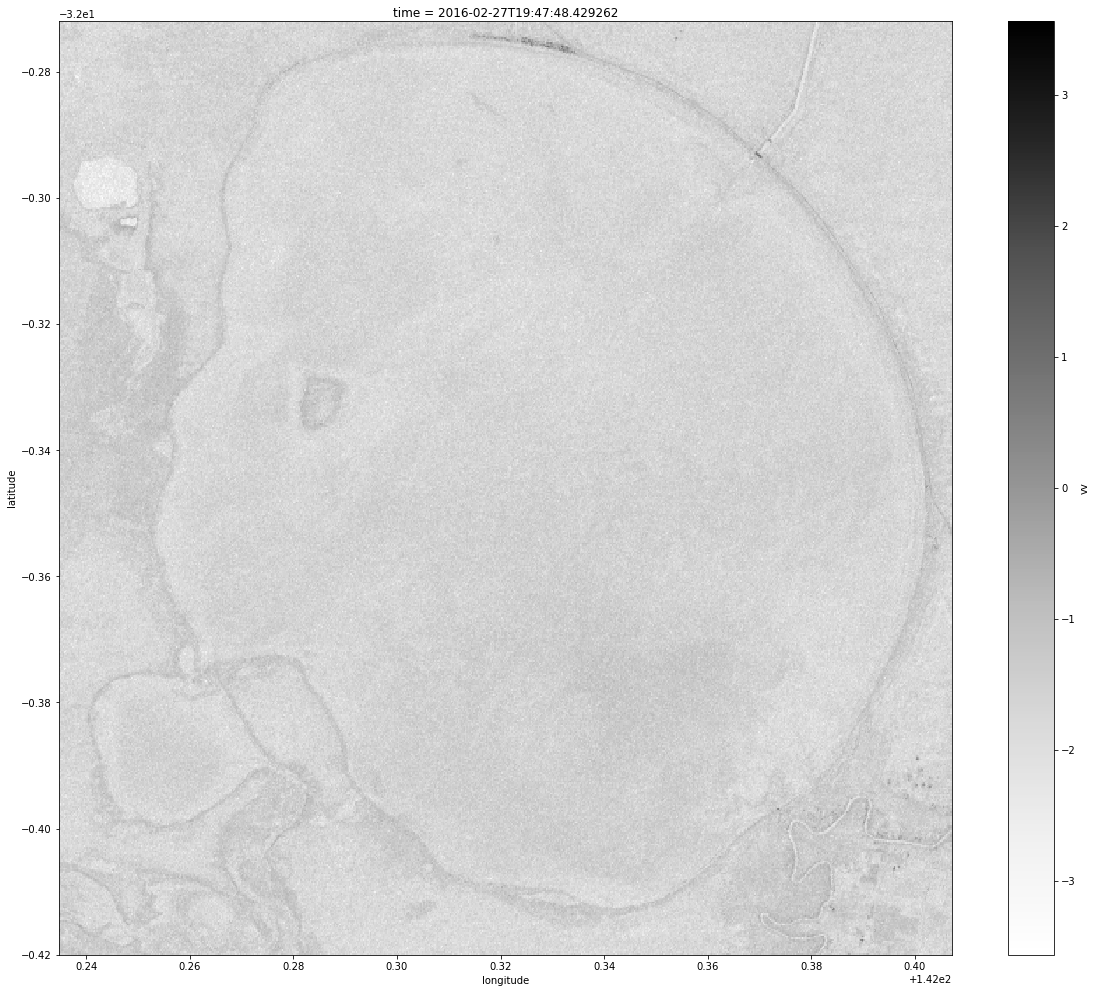

In [14]:
np.log10(first_slice.vv).plot(cmap = "Greys",figsize = figure_ratio(first_slice))

### plot vv/vh

#### Define ratio function
This is a very simple function. It's defined in this notebook just to show how how arithmetic operations scale on an xarray datasets and how to add/augment a dataset with synthetic variables
<br>  
$$ dataset_{a\_per\_b} = \frac{dataset_a}{dataset_b} $$  
  
<br>

In [15]:
import xarray as xr 
def augment_dataset_with_ratio(ds: xr.Dataset, band_name_1: str, band_name_2 :str) -> xr.Dataset:
    a_per_b = (ds[band_name_1]/ds[band_name_2])
    a_per_b = a_per_b.to_dataset(name = '{b1}_per_{b2}'.format(b1 = band_name_1, b2 = band_name_2)) # turn xarray.dataarray into xarray dataset and name dataset variable.
    return ds.merge(a_per_b)

<br> 
<br> 

Apply function and display new `xarray.Dataset`  
<br> 


In [16]:
first_slice = augment_dataset_with_ratio(first_slice, "vv", "vh")
first_slice = augment_dataset_with_ratio(first_slice, "vh", "vv")

print(first_slice)

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
    time       datetime64[ns] 2016-02-27T19:47:48.429262
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vh         (latitude, longitude) float32 0.00291662 0.00763605 0.0033502 ...
    vv         (latitude, longitude) float32 0.0203737 0.013546 0.0154714 ...
    vv_per_vh  (latitude, longitude) float32 6.98538 1.77395 4.61804 2.99544 ...
    vh_per_vv  (latitude, longitude) float32 0.143156 0.563713 0.216542 ...
Attributes:
    crs:      EPSG:4326


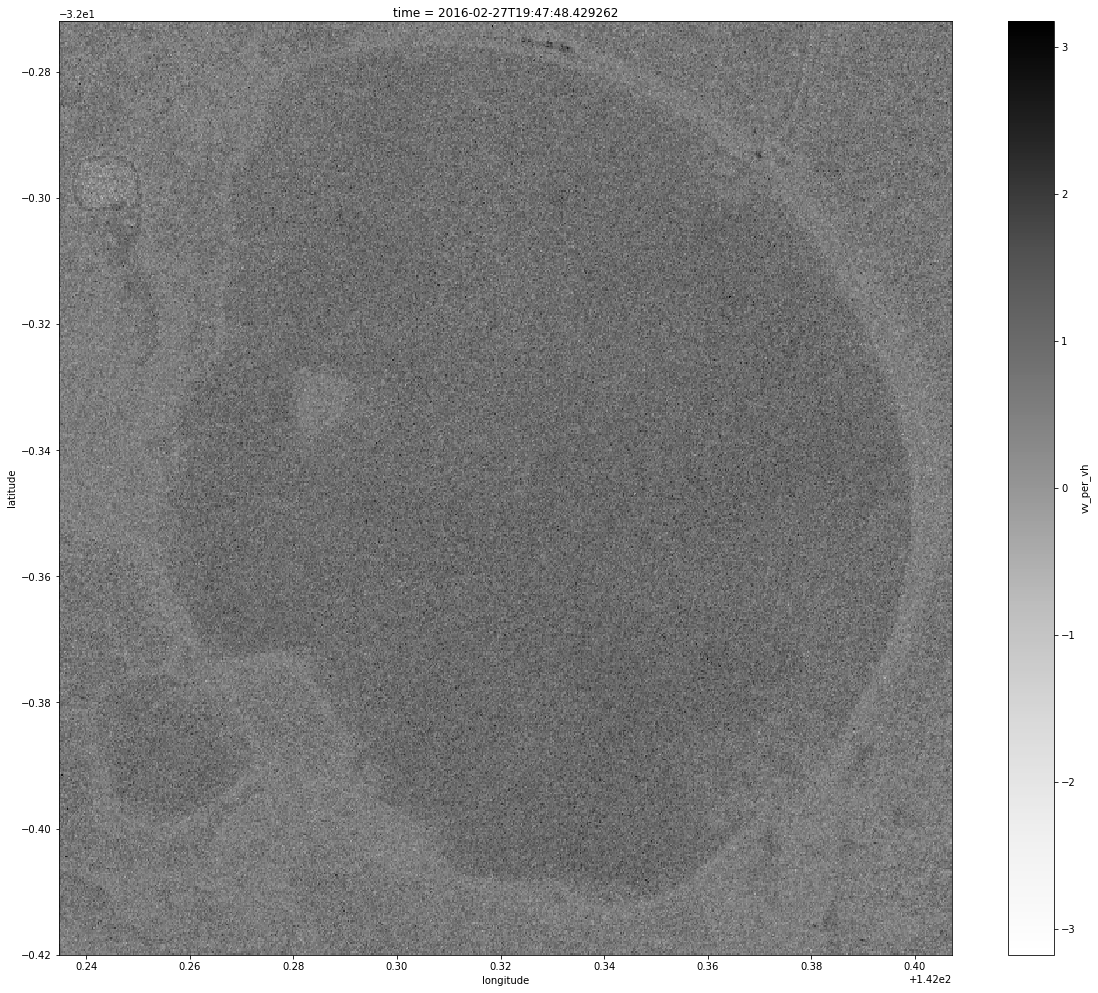

In [17]:
np.log10(first_slice.vv_per_vh).plot(cmap = "Greys", figsize = figure_ratio(first_slice))

### plot false color

The function below defines a basic normaization and plotting function for xarrays. I would not recommend re-using this unless you understand your data in great enough detail to determine that this suites your needs. This is a first pass at including a plotting utility in our S1 analysis workflow. The canonical approach or desired results would be something along the lines of following established processing methods used in something like ESA's [Sentinel-1 Toolbox](http://seom.esa.int/landtraining2015/files/Day_5/D5P1a_LTC2015_Foumelis.pdf) or from the [Sentinel Callibration Guide](https://sentinel.esa.int/documents/247904/685163/S1-Radiometric-Calibration-V1.0.pdf).

In [18]:
import numpy as np
import xarray as xr

def build_rgb_from_ds(_dataset: xr.Dataset,
                      r:str = None,
                      g:str = None,
                      b:str = None, 
                      logarithmic_scale_enabled = False):
    
    norm = _dataset.copy()

    if logarithmic_scale_enabled == True:
        norm[r] = np.log10(norm[r]) 
        norm[g] = np.log10(norm[g]) 
        norm[b] = np.log10(norm[b]) 

    norm = (255 * _dataset/_dataset.max()).astype(np.uint16)
    
    _r = norm[r].values #.astype(np.float32)
    _g = norm[g].values #.astype(np.float32)
    _b = norm[b].values #_per_vh.astype(np.float32)
    _rgb = np.dstack([_r,_g,_b])
    return _rgb

In [19]:
rgb = build_rgb_from_ds(first_slice,
                        r = "vv", 
                        g = "vh",
                        b = "vv_per_vh")

<br>

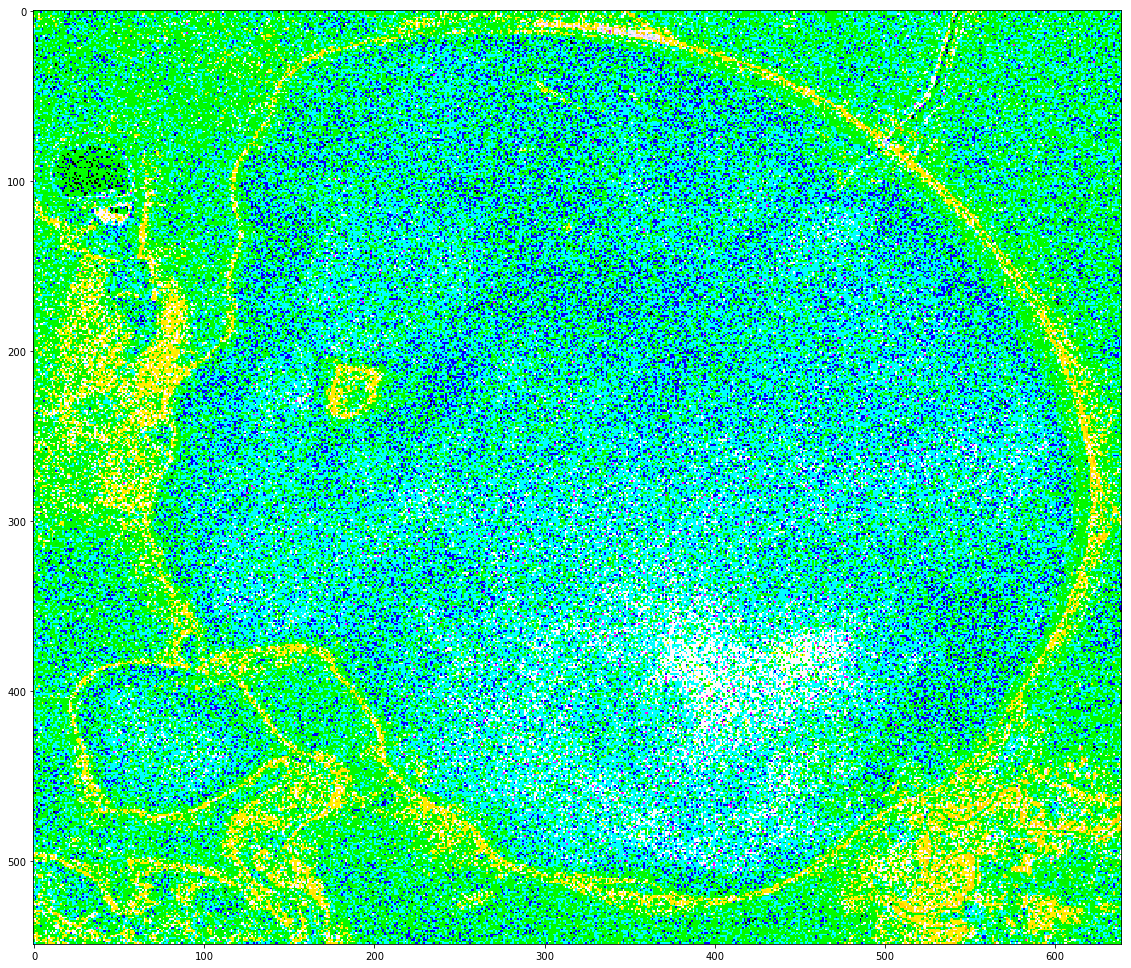

In [20]:
import matplotlib.pyplot as plt
plt.figure( figsize = figure_ratio(first_slice))
plt.imshow( rgb )

<br>  
# Build a median value composite(mosaic) for your time series 

The following section gets messy. We build a mosaic peice by peice, rather than all at once. This employs a chunking processes whereby small extents are queried and processed.  

In [21]:
from utils.data_cube_utilities.dc_chunker import create_geographic_chunks, combine_geographic_chunks

geographic_chunks = create_geographic_chunks(latitude=extent["lat"], longitude=extent["lon"], geographic_chunk_size=.05)

<br>

In [22]:
for x in geographic_chunks:
    print(x)

{'longitude': (142.2348, 142.407), 'latitude': (-32.42, -32.272)}


<br>  

In [23]:
from utils.data_cube_utilities.dc_mosaic import create_median_mosaic
from utils.data_cube_utilities.dc_sar_utils import dn_to_db 
import warnings
warnings.filterwarnings("ignore")

import numpy as np  

measurements = ['vv', 'vh']
product_chunks = []

# This part is unpythonic but explicit
for index, chunk in enumerate(geographic_chunks):
    data = dca.get_dataset_by_extent(extent["product"], 
                                    longitude=chunk['longitude'], latitude=chunk['latitude'], 
                                    measurements=measurements)
    if 'vv' in data:
        product_chunks.append(create_median_mosaic(data, clean_mask=np.full((data.vv.shape), True), dtype="float32", no_data=0))
        

final_mosaic = combine_geographic_chunks(product_chunks)


In [24]:
final_mosaic

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vv         (latitude, longitude) float32 0.0206857 0.0187738 0.0236709 ...
    vh         (latitude, longitude) float32 0.00314223 0.0036802 0.0032167 ...

In [25]:
final_mosaic = augment_dataset_with_ratio(final_mosaic, "vv", "vh")
final_mosaic = augment_dataset_with_ratio(final_mosaic, "vh", "vv")

In [26]:
final_mosaic

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vv         (latitude, longitude) float32 0.0206857 0.0187738 0.0236709 ...
    vh         (latitude, longitude) float32 0.00314223 0.0036802 0.0032167 ...
    vv_per_vh  (latitude, longitude) float32 6.58313 5.1013 7.35876 5.96425 ...
    vh_per_vv  (latitude, longitude) float32 0.151904 0.196028 0.135892 ...

### Plot Median Composite

In [27]:
rgb = build_rgb_from_ds(final_mosaic,
                        r = "vv", 
                        g = "vh",
                        b = "vh_per_vv")

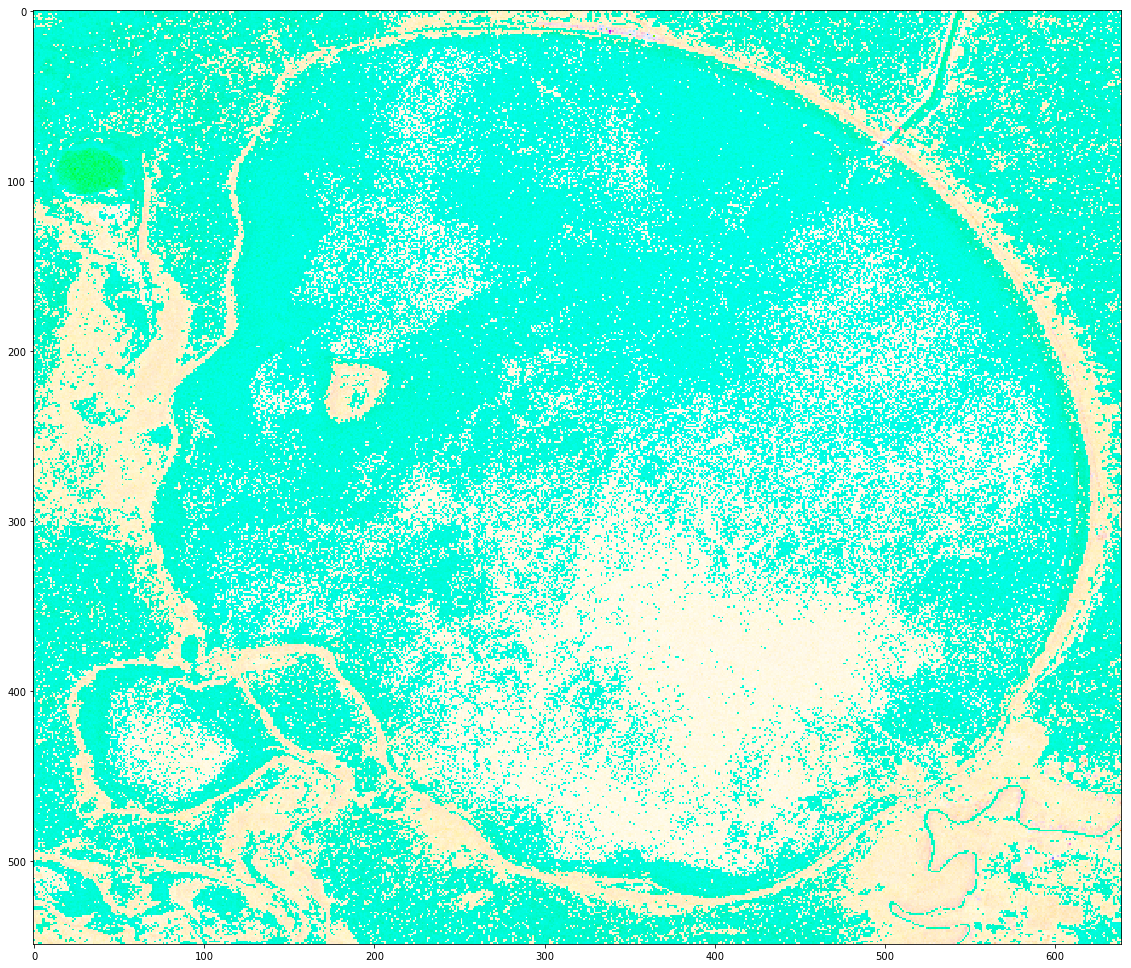

In [28]:
import matplotlib.pyplot as plt
plt.figure( figsize = figure_ratio(final_mosaic))
plt.imshow( rgb )

# Pixel Drill Analysis


In [29]:
dataset = augment_dataset_with_ratio(dataset, "vv", "vh") ## Compute VV/VH for entire dataset rather than just a slice(see section above)


### Chose a pixel  
Choose a pixel  from the bounded box below (A click will reveal lat and lon coordinates)     
<br> 

In [30]:
display_map(latitude  = extent['lat'], longitude = extent['lon'])  

In [31]:
# Lat and Lon coordinates extracted from the map above 
pixel_lat = -32.3626 #Menindee
pixel_lon = 142.2764 #Menindee

pixel_lat = 11.1306
pixel_lon = 107.6052

Select a pixel from our `xarray.Dataset` using nearest neighbor.  

In [32]:
pixel = dataset.sel(latitude  = pixel_lat,
                    longitude = pixel_lon,
                    method = 'nearest') # nearest neighbor selection  

<br> 

In [33]:
pixel

<xarray.Dataset>
Dimensions:    (time: 54)
Coordinates:
  * time       (time) datetime64[ns] 2016-02-15T19:48:13.448436 ...
    latitude   float64 -32.27
    longitude  float64 142.2
Data variables:
    vh         (time) float32 0.0 0.00291662 0.0 0.00309272 0.0 0.00258735 ...
    vv         (time) float32 0.0 0.0203737 0.0 0.017375 0.0 0.00989066 0.0 ...
    vv_per_vh  (time) float32 nan 6.98538 nan 5.61805 nan 3.82269 nan 16.152 ...
Attributes:
    crs:      EPSG:4326

<br> 

### Distributions( pixel histogram per band)  

#### VH

(array([ 29.,   5.,   8.,   2.,   1.,   3.,   1.,   1.,   2.,   2.]),
 array([ 0.        ,  0.00106547,  0.00213094,  0.00319641,  0.00426188,
         0.00532735,  0.00639282,  0.00745829,  0.00852375,  0.00958922,
         0.01065469]),
 <a list of 10 Patch objects>)

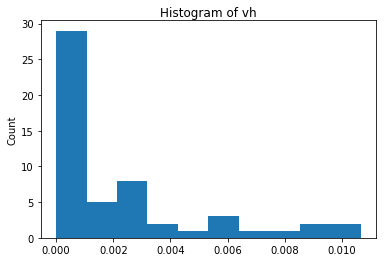

In [34]:
pixel.vh.plot.hist()

#### VV

(array([ 29.,   6.,   9.,   3.,   2.,   2.,   0.,   1.,   1.,   1.]),
 array([ 0.        ,  0.00788493,  0.01576985,  0.02365478,  0.03153971,
         0.03942463,  0.04730956,  0.05519448,  0.06307941,  0.07096434,
         0.07884926]),
 <a list of 10 Patch objects>)

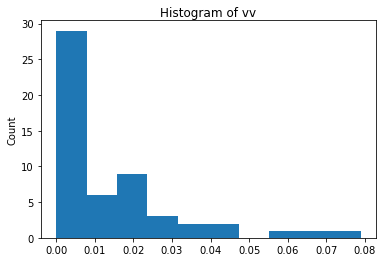

In [35]:
pixel.vv.plot.hist()

### Plot Pixel Bands

### VH

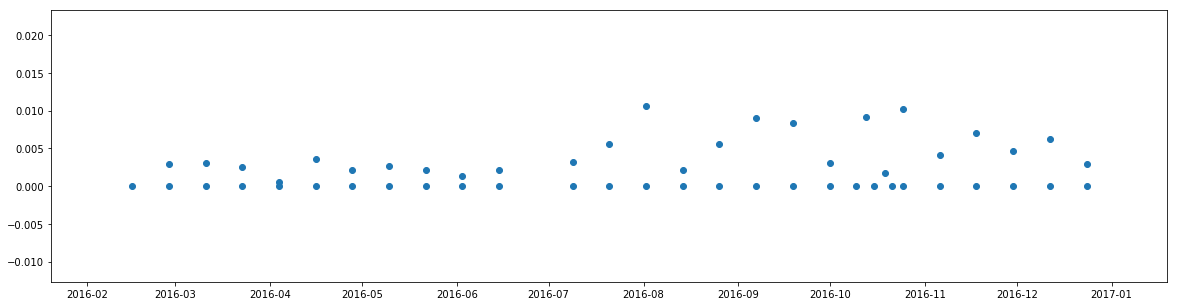

In [36]:
## X-axis time, Y-axis values of vh
plt.figure(figsize = (20,5)) 
plt.scatter(pixel.time.values, pixel.vh.values)

### Log10(VH)

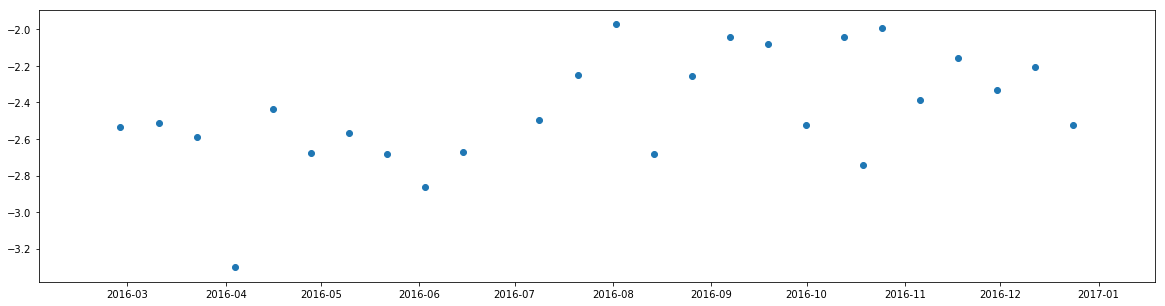

In [37]:
## X-axis time, Y-axis values of vh
plt.figure(figsize = (20,5)) 
plt.scatter(pixel.time.values,  np.log10(pixel.vh.values))

### VV

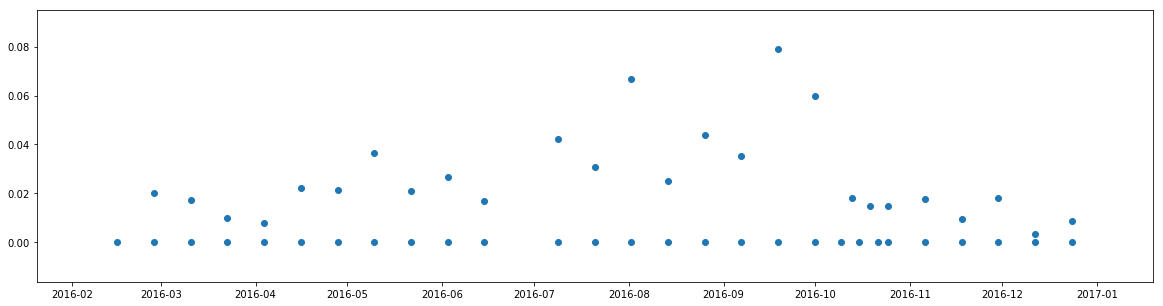

In [38]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,  pixel.vv.values)

### Log10(VV) 

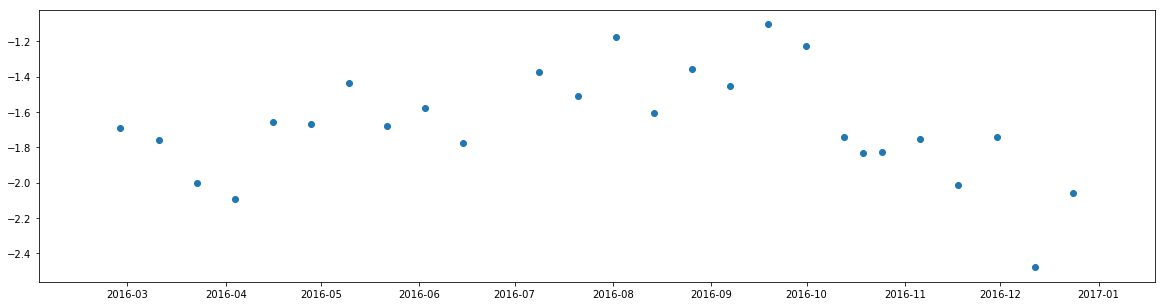

In [39]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,  np.log10(pixel.vv.values))

### VV/VH

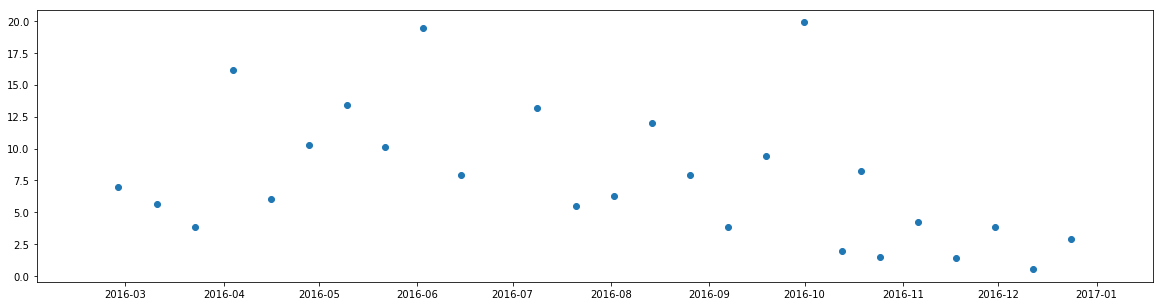

In [40]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values, pixel.vv_per_vh.values)

### Log10(VV) / Log10(VH)  

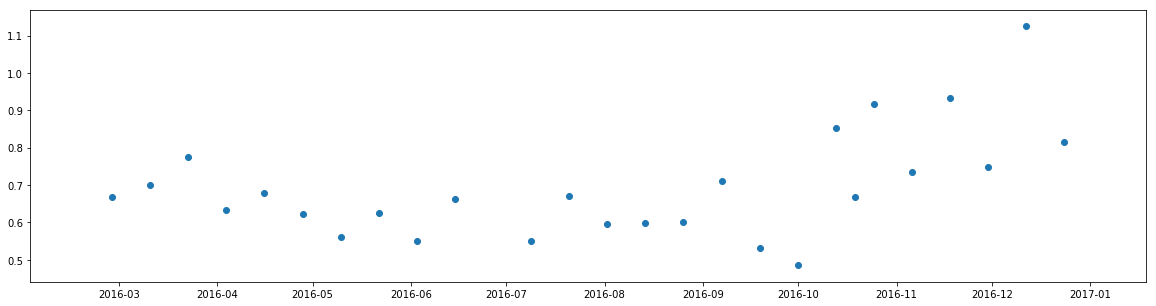

In [41]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,
            (np.log10(pixel.vv) / np.log10(pixel.vh)).values
           )

<br>  
<br>  
# Box and Whisker Plot for the Loaded Dataset

In [42]:
def ds_to_timeseries(ds, band, log = False):
    da = ds[band]
    da = np.log10(da) if log == True else da
    da_by_time_slices = [da.isel(time = i) for i in range(len(da.time))]
    return [x.values[np.isfinite(x.values)].flatten() for x in da_by_time_slices]    

### VV

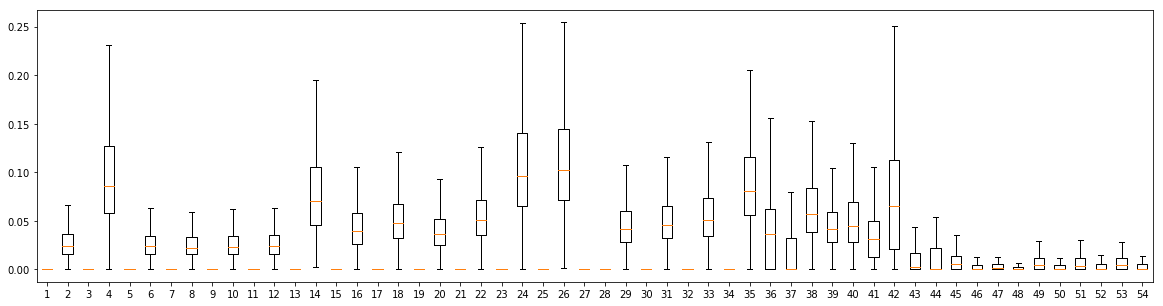

In [43]:
plt.figure(figsize = (20,5))

plt.boxplot(ds_to_timeseries(dataset, "vv"), 0, "");


### VH

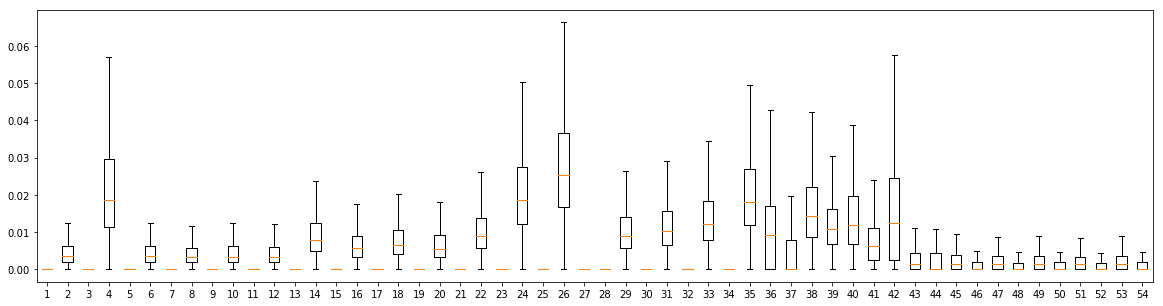

In [44]:
plt.figure(figsize = (20,5))
plt.boxplot(ds_to_timeseries(dataset, "vh"), 0, "");

### VV/VH

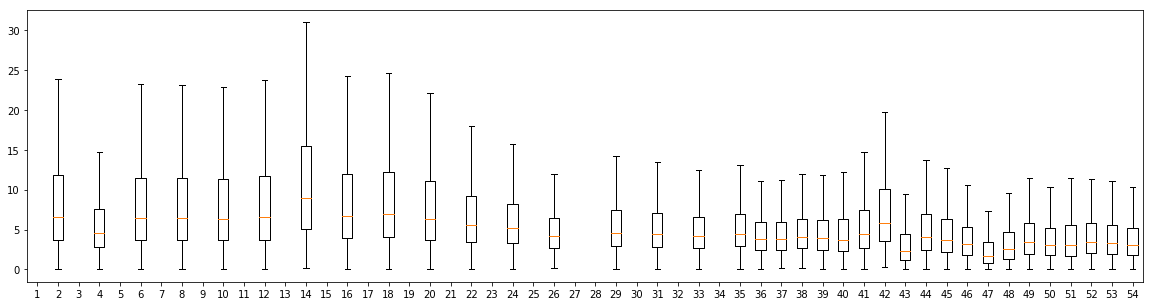

In [45]:
plt.figure(figsize = (20,5))
plt.boxplot(ds_to_timeseries(dataset, "vv_per_vh"), 0, "");

## Apply threshold to data  

In [46]:
import matplotlib
def plot_threshold(ds, band_name, bottom = None , top = None, log_scaled = False, cmap_name = 'Greys'):
    # Threshold is applied to original data, not log scaled data(if you haven't scaled already)
    _range = "Full {} range: {}-{}".format(band_name, ds[band_name].min().values,ds[band_name].max().values )
    
    def figure_ratio(ds, fixed_width = 20):
        width = fixed_width
        height = len(ds.latitude) * (fixed_width / len(ds.longitude))
        return (width, height)
    
    selection = ds[band_name]
    
    my_cmap = matplotlib.cm.get_cmap(cmap_name)
    my_cmap.set_over('r')
    my_cmap.set_under('b')

    plt.figure(figsize = figure_ratio(ds))
    
    selection = np.log10(selection) if log_scaled == True else selection
    
    bottom    = np.log10(bottom)    if log_scaled == True and bottom is not None else bottom
    top       = np.log10(top)       if log_scaled == True and top is not None else top
    
    selection.plot(cmap = my_cmap, vmax =top, vmin = bottom)    
    plt.figtext(0.7,0,_range, horizontalalignment = "center")

### VV(no threshold)

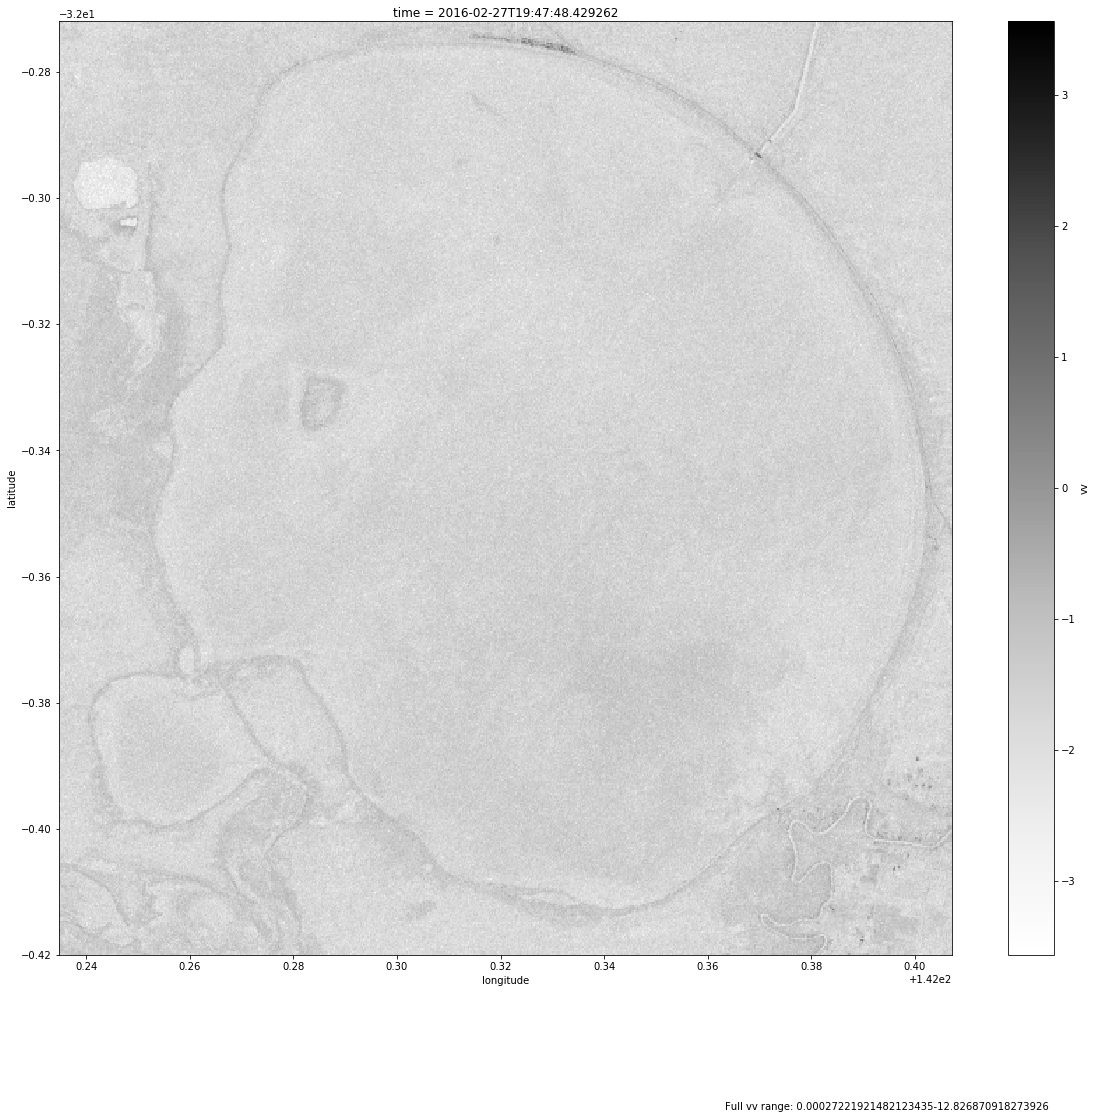

In [47]:
plot_threshold(first_slice, "vv", log_scaled = True)

### VV(threshold) 

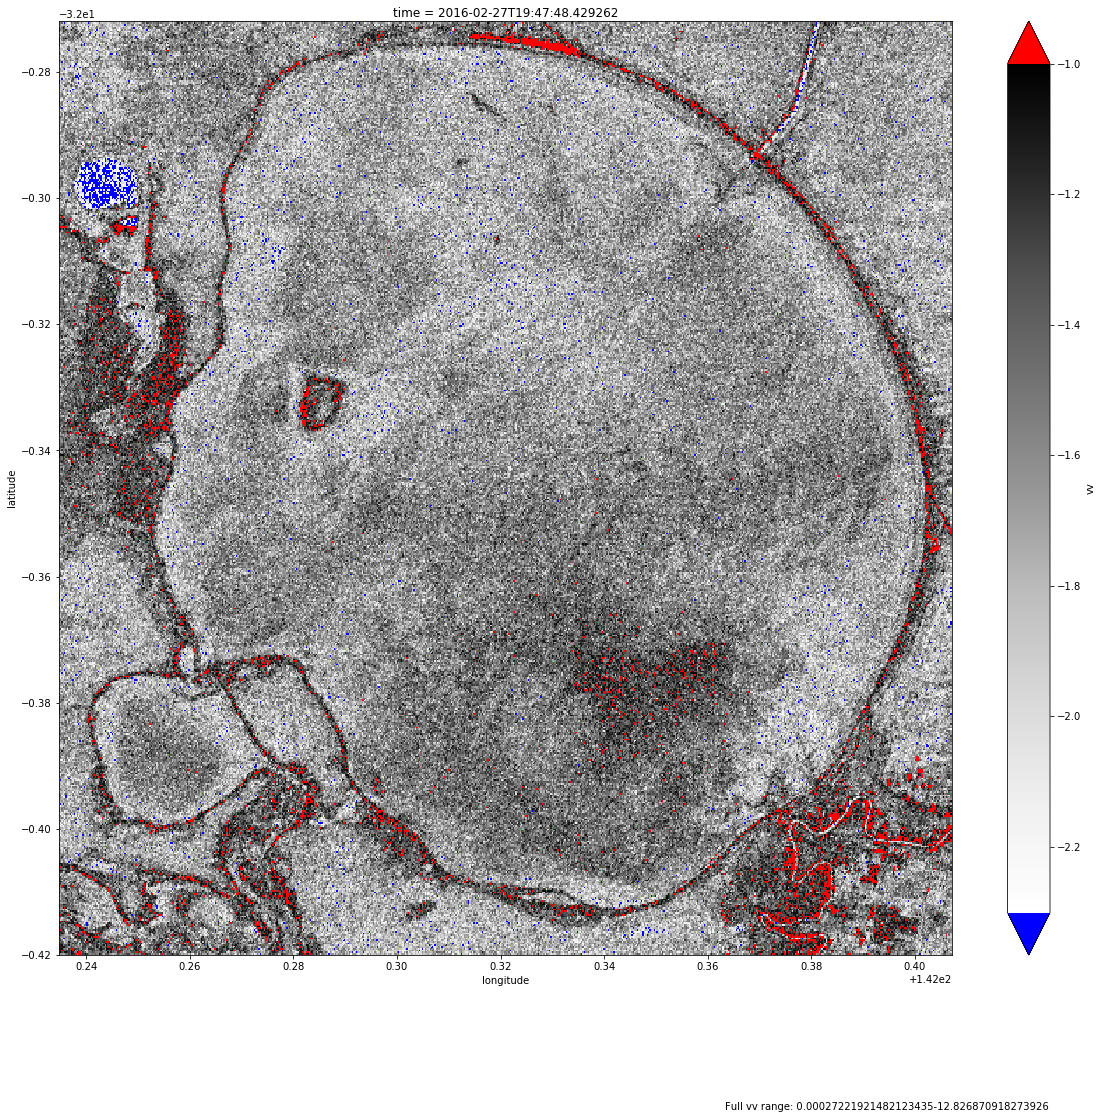

In [48]:
plot_threshold(first_slice, "vv",
               bottom = 0.005, 
               top = .1, 
               log_scaled = True)

### VH( no threshold ) 

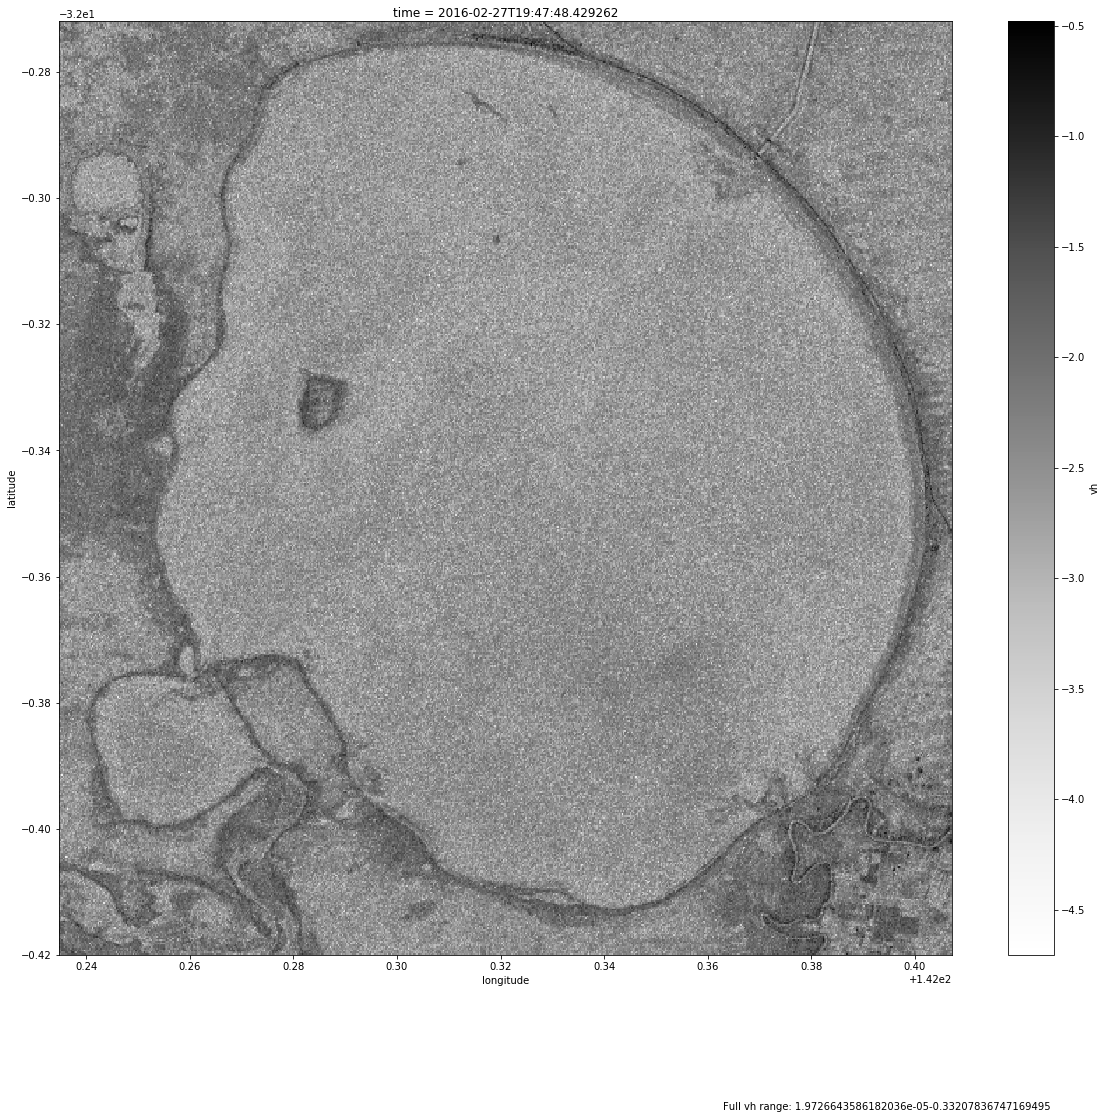

In [49]:
plot_threshold(first_slice, "vh", log_scaled = True)

### VV(threshold) 

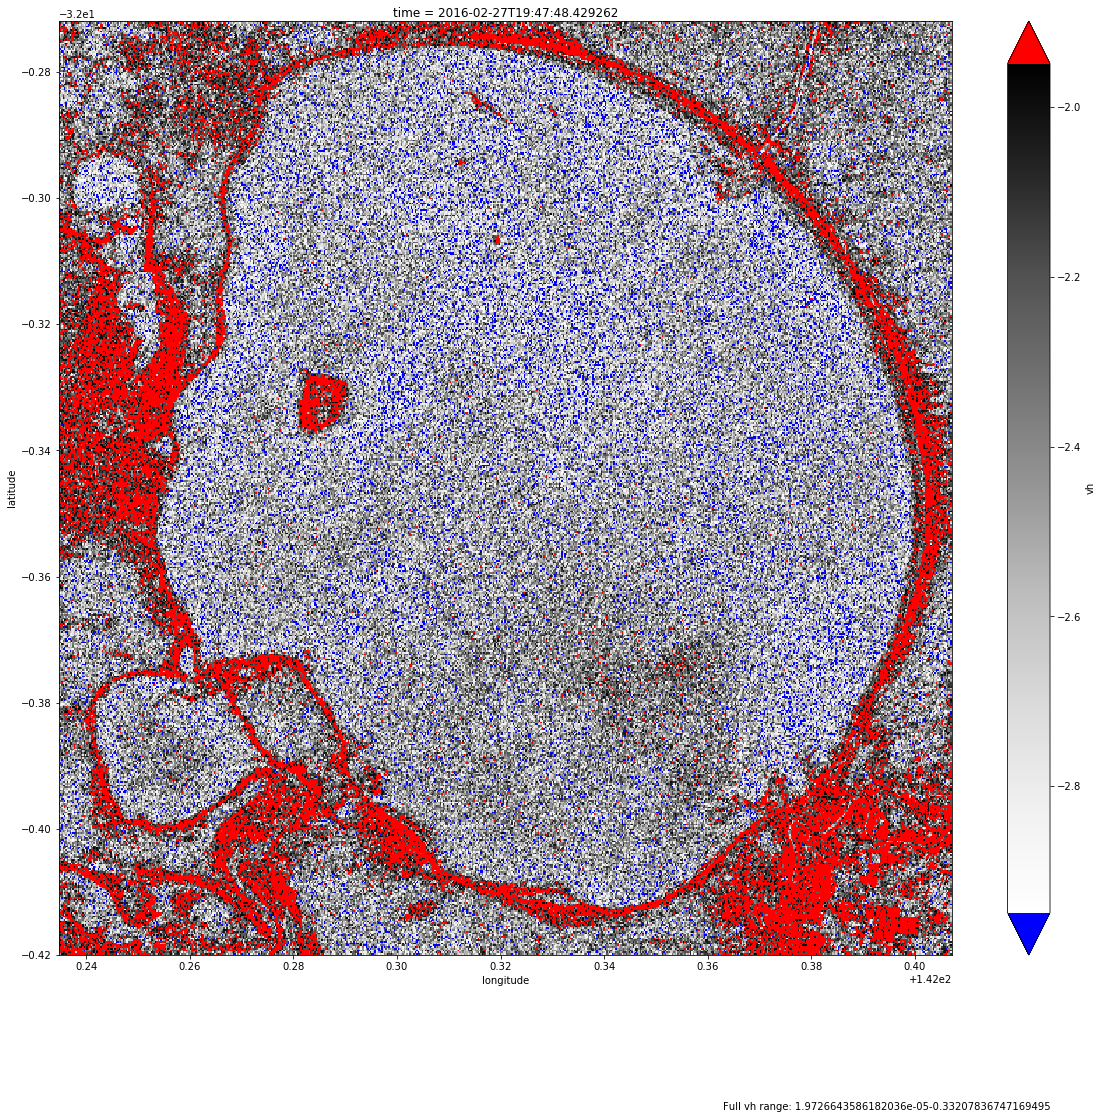

In [50]:
plot_threshold(first_slice,
               "vh",
               log_scaled = True,
               bottom = 0.001125,
               top = 0.01125
               )